In [7]:
def Print_values(a, b, c):
    # 根据流程图来判断和排序
    if a > b:
        # a比b大的情况
        if b > c:
            # a > b > c
            x = a
            y = b
            z = c
        else:
            # b <= c, 需要再比较a和c
            if a > c:
                # a > c >= b
                x = a
                y = c
                z = b
            else:
                # c >= a > b
                x = c
                y = a
                z = b
        
        # 打印排序后的值
        print(f"排序后的顺序: x={x}, y={y}, z={z}")
        
        # 计算 x + y - 10z
        result = x + y - 10 * z
        print(f"计算结果: {x} + {y} - 10 × {z} = {result}")
        
        return result
        
    else:
        # a <= b的情况
        if b > c:
            # 流程图这里无进一步指向，表示"无输出"
            print("无输出")
        else:
            # b <= c，输出 c, b, a
            x = c
            y = b
            z = a
            
            # 打印排序后的值
            print(f"排序后的顺序: x={x}, y={y}, z={z}")
            
            # 计算 x + y - 10z
            result = x + y - 10 * z
            print(f"计算结果: {x} + {y} - 10 × {z} = {result}")
            
            return result


# 测试代码
Print_values(3, 8, 5)
print()
Print_values(12, 4, 9)
print()
Print_values(7, 7, 2)
print()

# 要求的测试值
Print_values(5, 15, 10)

无输出

排序后的顺序: x=12, y=9, z=4
计算结果: 12 + 9 - 10 × 4 = -19

无输出

无输出


In [5]:
import math
def calculate_F(x):
    if x == 1:
        return 1
    # 如果 x 不是 1，我们需要先算出 x÷3 向上取整
    x_divided = math.ceil(x / 3)
    #然后跳到新的 calculate_F(x_divided)
    #当前这个函数会暂停，等新函数返回结果
    #此处借鉴学习了CSDN社区关于"Python基础——递归及其经典例题（阶乘、斐波那契数列、汉诺塔）"的讲解获得灵感
    #类似于循环嵌套 直到有return的值返回 才继续执行下一步的计算 然后算出result 然后返还result给上一层 也就是在返还给了smaller_result的值  
    smaller_result = calculate_F(x_divided)  
    result = smaller_result + 2 * x
    return result
# 输入 N 个正整数（用空格分隔）
numbers = list(map(int, input().split()))

# 对列表中的每个元素调用函数并输出结果
for num in numbers:
    answer = calculate_F(num)
    print(f"F({num})={answer}")

 12


F(12)=37


In [80]:
3.1 #这道题询问了Ai关于题目的解析理解，以确保正确理解题意，也就是当同时掷出 10 个骰子时，有多少种不同的 “骰子点数组合” 能让它们的总和等于 x
def Find_number_of_ways(x, n=10, faces=6):
    # 不可能的和，直接返回 0
    if x < n or x > n * faces:
        return 0
    # dp[s] 表示“用若干颗骰子”得到点数 s 的方案数
    # 开始时还没掷骰子：和为 0 的方案数是 1（什么都不做）
    dp = [0] * (n * faces + 1)
    dp[0] = 1

    # 逐颗加入骰子，然后更新可能得和以及方法数
    for _ in range(n):
        new_dp = [0] * (n * faces + 1)
        for s in range(len(dp)):
            if dp[s] == 0:
                continue
            # 当前这颗骰子可以是 1..faces
            for v in range(1, 7):
                new_dp[s + v] += dp[s]
        dp = new_dp
    return dp[x]
#测试：10 颗骰子得到和为 30 的方案数
print(Find_number_of_ways(30)) 

#3.2 上面已经知道每个和所对应的方法数了，那么直接循环遍历10到60 比较一下哪个数大 就是最大的数了
Number_of_ways = []  # 建一个空列表
for x in range(10, 61):
    Number_of_ways.append(Find_number_of_ways(x))
max_value = max(Number_of_ways)
max_x = 10 + Number_of_ways.index(max_value)
print(f"最大方法数的和出现在 x = {max_x}，方法数 = {max_value}")

2930455
最大方法数的和出现在 x = 35，方法数 = 4395456


[2, 10, 4, 5]


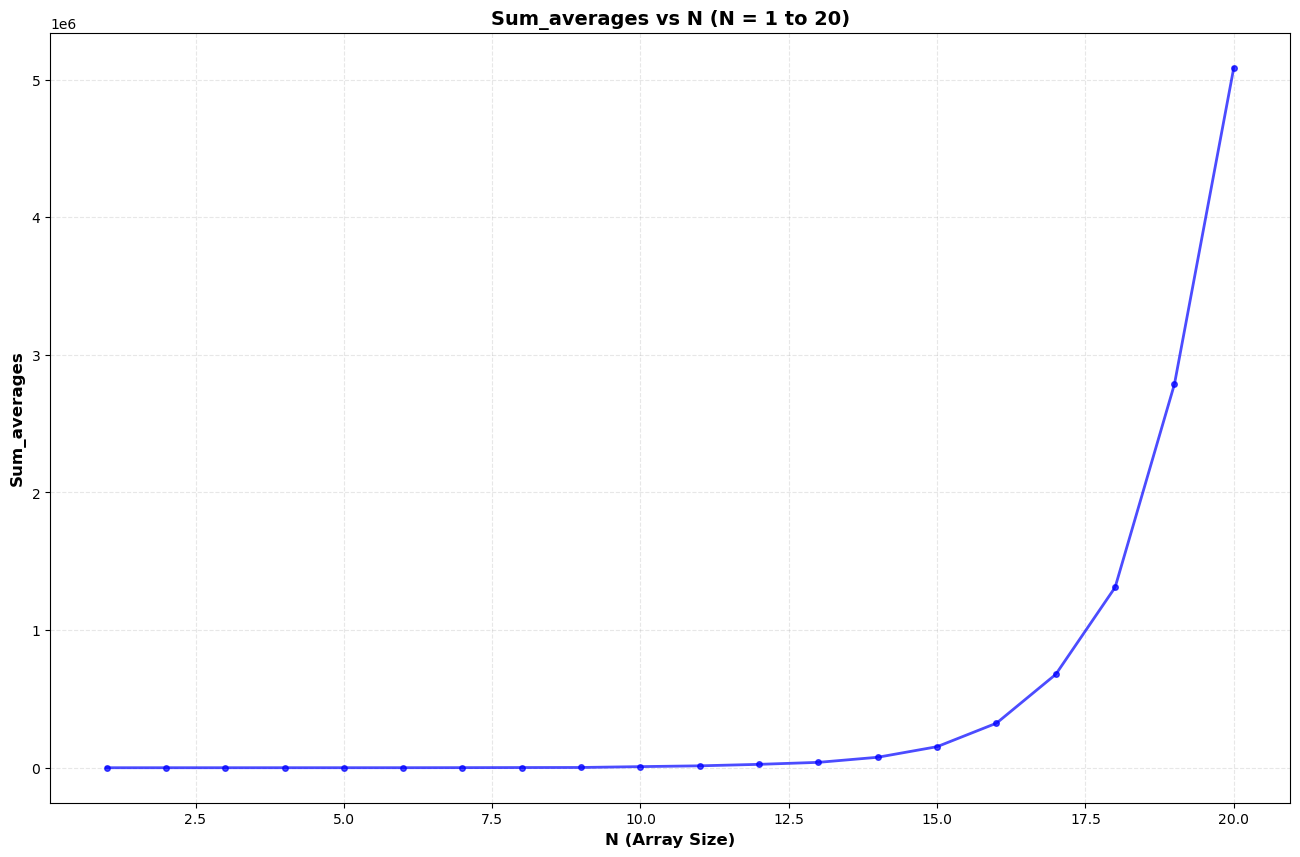

In [3]:
import random
def Random_integer(N):
    array = []                          # 创建空数组
    for i in range(N):                  # 循环N次
        random_number = random.randint(0, 10)  # 生成0-10的随机数
        array.append(random_number)     # 添加到数组
    return array                        # 返回数组

import itertools   #询问Ai得到的包  有询问有没有快速得到所有子集的方法
def Sum_averages(array):
    array_length = len(array)    #获取数组的长度
    total_sum = 0
    all_subsets = [] #创建一个列表来存储所有子集,方便查看
    #遍历所有可能的子集大小，子集大小长度从1到array_length(包括1和array_length)
    for subset_size in range(1, array_length + 1):
        #使用itertools.combinations生成指定大小的所有组合  combinations(array, subset_size) 会生成所有长度为subset_size的子集
        subsets_of_current_size = itertools.combinations(array, subset_size)
        for subset in subsets_of_current_size:   #遍历当前大小的每一个子集
            subset_list = list(subset) #将元组转换为list
            subset_sum = sum(subset_list)#把列表中所有元素加起来
            subset_average = subset_sum / len(subset_list) # 平均值 = 总和 / 元素个数
            total_sum = total_sum + subset_average #把这个平均值加到总和中
            all_subsets.append({
                'subset': subset_list,
                'sum': subset_sum,
                'average': subset_average
            })  #保存子集信息  便于检查查看
    
    #返回所有子集平均值的总和
    return total_sum
#测试
array1=Random_integer(4)
print(array1)
Sum_averages(array1)

import matplotlib.pyplot as plt
Total_sum_averages = []
max_N = 20  #计算到N=20 (如果要计算到100,子集数量太多了，我的电脑等了好久也没跑出来)
for N in range(1, max_N + 1):
    # 生成包含N个随机整数(0-10)的数组
    array = Random_integer(N)
    # 调用Sum_averages函数计算所有子集平均值之和
    result = Sum_averages(array)
    # 将结果添加到列表中
    Total_sum_averages.append(result)
fig = plt.figure(figsize=(16, 10))
x_values = list(range(1, len(Total_sum_averages) + 1))
plt.plot(x_values, Total_sum_averages, linewidth=2, color='blue', 
         marker='o', markersize=4, alpha=0.7)
plt.xlabel('N (Array Size)', fontsize=12, fontweight='bold')
plt.ylabel('Sum_averages', fontsize=12, fontweight='bold')
plt.title(f'Sum_averages vs N (N = 1 to {max_N})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

In [1]:
import random
def create_matrix(N, M):
    matrix = []
    for row_index in range(N):                   #用循环创建每一行，并填充随机数range(N) 会生成从 0 到 N-1 的数字，代表每一行的索引
        current_row = []                         #创建一个空列表，用来存放当前这一行的所有元素
        for column_index in range(M):            #再用一个循环创建当前行的每一列  range(M) 会生成从 0 到 M-1 的数字，代表每一列的索引
            random_value = random.randint(0, 1)  #使用 random.randint(0, 1) 随机生成 0 或 1
            current_row.append(random_value)     #把这个随机值添加到当前行
        matrix.append(current_row)      #把完成的这一行添加到矩阵中
    matrix[0][0] = 1                  
    matrix[N - 1][M - 1] = 1

    return matrix
#如果说我要走到最右下角，那么我肯定要么是从上面的格子走下来，要么就是从左边的格子走过来，那么也就是知道走到左边的格子有几种方法
#那么总数就是 上面的格子的方法数加上左边格子的方法数，同理 那么左边的格子的方法数 也等同于这样 所以只要推断出到每个格子的方法数  一步步往下推就行
#创建一个M行N列的空的来储存到每个格子的方法数
def Count_path(matrix, N, M):
    dp =[[0 for j in range(M)] for i in range(N)]
    dp[0][0]=1 #创建这个数组用来储存每个格子的方法数  并且到达左上角的格子数的方法就是为 1
    for i in range(N):
        for j in range(M):
            if matrix[i][j] == 0:  #本身是障碍物 那么我到不了这个格子 方法数为0
                dp[i][j] = 0
                continue
            if i == 0 and j == 0:
                continue
            if i > 0:
                from_top = dp[i-1][j]
            else:
                from_top = 0
            if j > 0:
                from_left = dp[i][j-1]
            else:
                from_left = 0
            dp[i][j] = from_top + from_left
    
    return dp[N-1][M-1]
#测试
#array=create_matrix(3, 3)
#print(array)
#Count=Count_path(array, 3, 3)
#print(Count)

#创建一个十行八列的随机数组  然后计算到右下角的方法数   创建1000个 记录这1000个到右下角的方法数是多少 
Fangfa =[]   #用来储存方法数
i=1000
while i > 0 :
    array=create_matrix(8, 10)
    Count=Count_path(array, 8, 10)
    Fangfa.append(Count)
    i =i-1
# print(Fangfa)
total_sum=sum(Fangfa)
averge=total_sum/1000
print(f"方法数的总和为 {total_sum}，平均值为 = {averge}")

方法数的总和为 310，平均值为 = 0.31
